# 3 - Pre-process remote sensing time series
This notebook opens and applies curve fitting to the Sentinel 2 and Landsat 8 time series

## Setup

In [1]:
# Import libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set working directory
os.chdir(os.path.join('D:/',
                      'McKinley'))

## Restore RS time series data

In [14]:
# Open the saved DF
%store -r landsat_8_time_series

# Convert index to date-time
landsat_8_time_series.index = pd.to_datetime(landsat_8_time_series.index)

# Select a single SU for testing purposes
seeding_unit = 1608
landsat_8_time_series_subset = landsat_8_time_series[landsat_8_time_series['SuId']==seeding_unit]

# Sort the DF by date
landsat_8_time_series_subset.sort_index(inplace=True)
landsat_8_time_series_subset

C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,SuId,MeanNdvi
date,,
2013-05-03,1608,0.139791
2013-06-04,1608,0.162795
2013-06-20,1608,0.149409
2013-07-06,1608,0.179682
2013-09-24,1608,0.290671
...,...,...
2020-10-29,1608,0.178928
2020-12-16,1608,0.079066
2021-01-17,1608,0.162746


## Resample data to consistent temporal sampling

In [15]:
# Resample the data
landsat_8_time_series_subset_interpol = landsat_8_time_series_subset.resample('2W').mean()

# Interpolate the missing values
landsat_8_time_series_subset_interpol['MeanNdvi'] = landsat_8_time_series_subset_interpol['MeanNdvi'].interpolate()
landsat_8_time_series_subset_interpol

,SuId,MeanNdvi
date,,
2013-05-05,1608.0,0.139791
2013-05-19,NaN,0.147459
2013-06-02,NaN,0.155127
2013-06-16,1608.0,0.162795
2013-06-30,1608.0,0.149409
...,...,...
2021-04-11,1608.0,0.132872
2021-04-25,NaN,0.138768
2021-05-09,NaN,0.144663


## Calculate moving window

In [16]:
landsat_8_time_series_subset_rlmean = landsat_8_time_series_subset_interpol.rolling(window = 26).mean()
landsat_8_time_series_subset_rlmean

,SuId,MeanNdvi
date,,
2013-05-05,NaN,NaN
2013-05-19,NaN,NaN
2013-06-02,NaN,NaN
2013-06-16,NaN,NaN
2013-06-30,NaN,NaN
...,...,...
2021-04-11,NaN,0.162077
2021-04-25,NaN,0.160362
2021-05-09,NaN,0.158214


## Plot the results

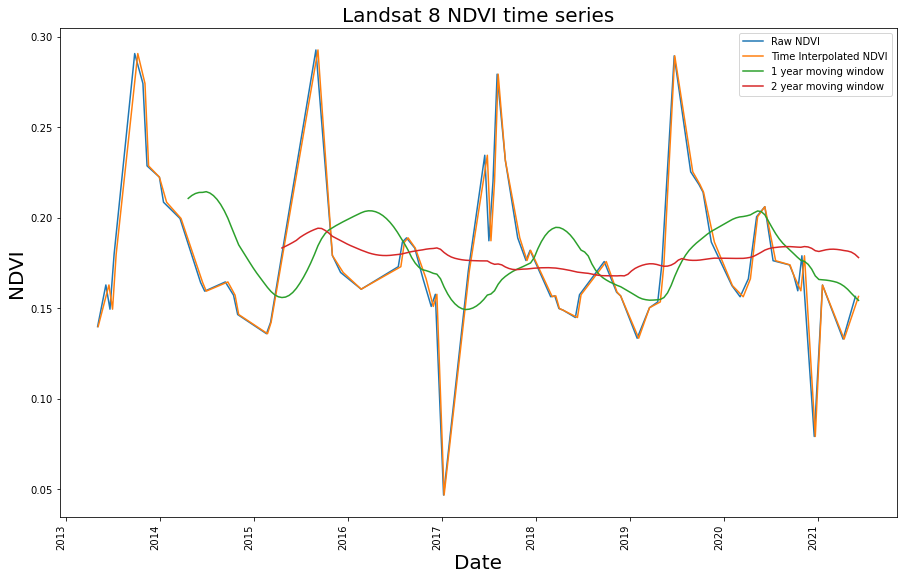

In [20]:
# Setup plot
fig, ax = plt.subplots(figsize=(15, 10))

landsat_8_time_series_subset.plot(y='MeanNdvi', ax=ax, use_index=True)
landsat_8_time_series_subset_interpol.plot(y='MeanNdvi', ax=ax, use_index=True)
landsat_8_time_series_subset_interpol.rolling(window = 26).mean().plot(y='MeanNdvi', ax=ax, use_index=True)
landsat_8_time_series_subset_interpol.rolling(window = 52).mean().plot(y='MeanNdvi', ax=ax, use_index=True)

plt.xlabel("Date", fontsize=20)
plt.ylabel("NDVI", fontsize=20)

legend_items = ['Raw NDVI', 'Time Interpolated NDVI', '1 year moving window', '2 year moving window']
plt.legend(legend_items)

ax.set_title(
    "Landsat 8 NDVI time series", fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

## Save the DF for use in subsequent notebooks

In [7]:
#%store mckinley_seeding_subset_PARlo